<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_1_6)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-1.6'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.6_n250.csv',
 'data_multi_delta_-1.6_n120.csv',
 'data_multi_delta_-1.6_n60.csv',
 'data_multi_delta_-1.6_n30.csv',
 'data_multi_delta_-1.6_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.6_n20.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,23.856350,-0.119143,33.737207,33.833243,-0.096036
1,0.0,1.0,88.039585,-0.009948,98.029637,98.050474,-0.020836
2,0.0,2.0,59.886645,0.001897,69.888541,69.882622,0.005920
3,0.0,3.0,69.446690,-0.021395,79.425294,79.447730,-0.022436
4,0.0,4.0,92.066867,0.016262,102.083129,102.079889,0.003240
...,...,...,...,...,...,...,...
19995,999.0,15.0,48.567613,0.047007,58.614621,58.573625,0.040996
19996,999.0,16.0,72.333263,0.044634,82.377897,82.333624,0.044273
19997,999.0,17.0,91.116954,-0.027068,101.089886,101.112848,-0.022962
19998,999.0,18.0,85.254416,-0.009167,95.245248,95.251704,-0.006455


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,23.856350,-0.119143,33.737207,33.833243,-0.096036
1,0.0,1.0,88.039585,-0.009948,98.029637,98.050474,-0.020836
2,0.0,2.0,59.886645,0.001897,69.888541,69.882622,0.005920
3,0.0,3.0,69.446690,-0.021395,79.425294,79.447730,-0.022436
4,0.0,4.0,92.066867,0.016262,102.083129,102.079889,0.003240
...,...,...,...,...,...,...,...
19995,999.0,15.0,48.567613,0.047007,58.614621,58.573625,0.040996
19996,999.0,16.0,72.333263,0.044634,82.377897,82.333624,0.044273
19997,999.0,17.0,91.116954,-0.027068,101.089886,101.112848,-0.022962
19998,999.0,18.0,85.254416,-0.009167,95.245248,95.251704,-0.006455


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    23.856350 -0.119143   33.737207   33.833243 -0.096036
      1.0    88.039585 -0.009948   98.029637   98.050474 -0.020836
      2.0    59.886645  0.001897   69.888541   69.882622  0.005920
      3.0    69.446690 -0.021395   79.425294   79.447730 -0.022436
      4.0    92.066867  0.016262  102.083129  102.079889  0.003240
...                ...       ...         ...         ...       ...
999.0 15.0   48.567613  0.047007   58.614621   58.573625  0.040996
      16.0   72.333263  0.044634   82.377897   82.333624  0.044273
      17.0   91.116954 -0.027068  101.089886  101.112848 -0.022962
      18.0   85.254416 -0.009167   95.245248   95.251704 -0.006455
      19.0   57.318110 -0.035522   67.282588   67.322040 -0.039453

[20000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    23.856350 -0.119143   33.737207   33.833243 -0.096036
      1.0    88.039585 -0.009948   98.029637   98.050474 -0.020836
      2.0    59.886645  0.001897   69.888541   69.882622  0.005920
      3.0    69.446690 -0.021395   79.425294   79.447730 -0.022436
      4.0    92.066867  0.016262  102.083129  102.079889  0.003240
...                ...       ...         ...         ...       ...
999.0 15.0   48.567613  0.047007   58.614621   58.573625  0.040996
      16.0   72.333263  0.044634   82.377897   82.333624  0.044273
      17.0   91.116954 -0.027068  101.089886  101.112848 -0.022962
      18.0   85.254416 -0.009167   95.245248   95.251704 -0.006455
      19.0   57.318110 -0.035522   67.282588   67.322040 -0.039453

[20000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,23.856350,-0.119143,33.737207,33.833243,-0.096036
1,0.0,1.0,88.039585,-0.009948,98.029637,98.050474,-0.020836
2,0.0,2.0,59.886645,0.001897,69.888541,69.882622,0.005920
3,0.0,3.0,69.446690,-0.021395,79.425294,79.447730,-0.022436
4,0.0,4.0,92.066867,0.016262,102.083129,102.079889,0.003240
...,...,...,...,...,...,...,...
19995,999.0,15.0,48.567613,0.047007,58.614621,58.573625,0.040996
19996,999.0,16.0,72.333263,0.044634,82.377897,82.333624,0.044273
19997,999.0,17.0,91.116954,-0.027068,101.089886,101.112848,-0.022962
19998,999.0,18.0,85.254416,-0.009167,95.245248,95.251704,-0.006455


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    23.856350 -0.119143   33.737207   33.833243 -0.096036
      1.0    88.039585 -0.009948   98.029637   98.050474 -0.020836
      2.0    59.886645  0.001897   69.888541   69.882622  0.005920
      3.0    69.446690 -0.021395   79.425294   79.447730 -0.022436
      4.0    92.066867  0.016262  102.083129  102.079889  0.003240
...                ...       ...         ...         ...       ...
999.0 15.0   48.567613  0.047007   58.614621   58.573625  0.040996
      16.0   72.333263  0.044634   82.377897   82.333624  0.044273
      17.0   91.116954 -0.027068  101.089886  101.112848 -0.022962
      18.0   85.254416 -0.009167   95.245248   95.251704 -0.006455
      19.0   57.318110 -0.035522   67.282588   67.322040 -0.039453

[20000 rows x 5 columns]

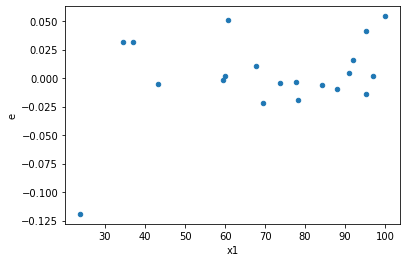

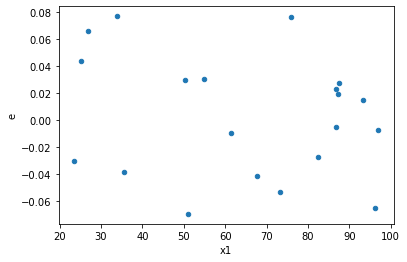

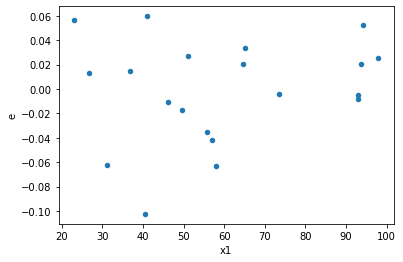

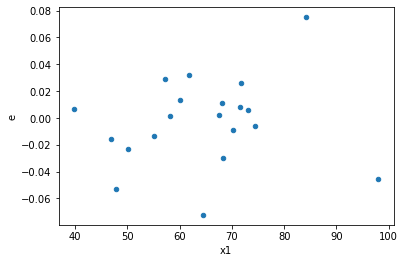

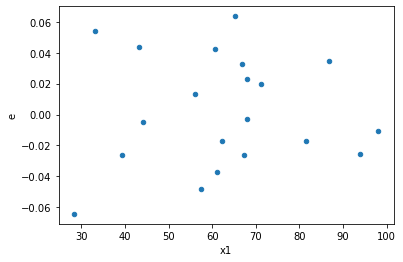

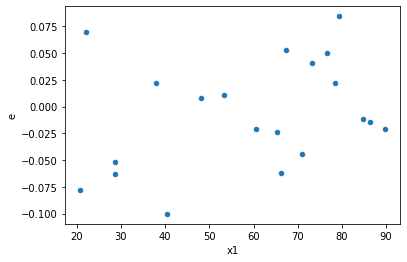

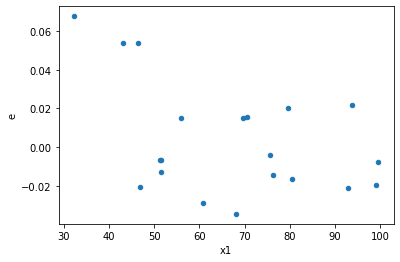

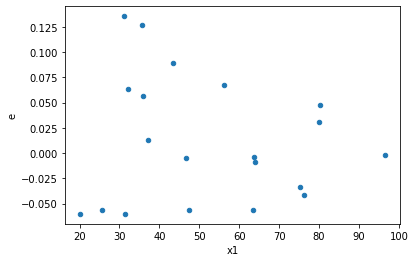

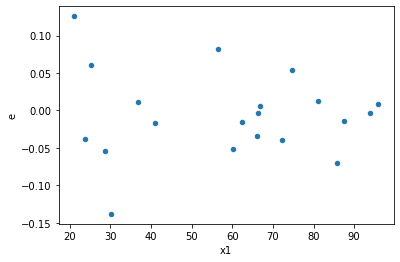

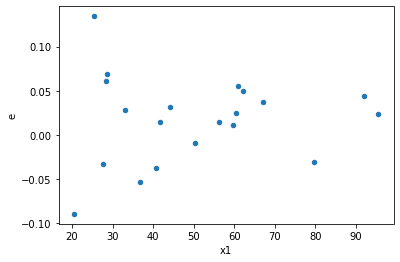

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,7.0,7.0,0.0038054437903590134,0.009301590013180936,0.0005436348271941448,0.0013287985733115622,2.444285220227469,0.26123153383287767,0.8693842330835612,0.13061576691643884,Reject001=1 : Homoscedasticity
14.0,7.0,7.0,0.006451232067920637,0.006740534137286455,0.0009216045811315197,0.0009629334481837793,1.0448444678969773,0.955341447954922,0.522329276022539,0.477670723977461,Reject001=1 : Homoscedasticity
23.0,7.0,7.0,0.003434347096385094,0.005179811840171595,0.0004906210137692991,0.0007399731200245135,1.5082377216978835,0.6010746931721849,0.6994626534139076,0.30053734658609244,Reject001=1 : Homoscedasticity
26.0,7.0,7.0,0.00656440115624037,0.017313311178431046,0.0009377715937486243,0.0024733301683472924,2.637454775592493,0.22402525361118508,0.8879873731944075,0.11201262680559254,Reject001=1 : Homoscedasticity
29.0,7.0,7.0,0.00473332391997811,0.006816064723932891,0.0006761891314254443,0.000973723531990413,1.440016537884526,0.6424384677075221,0.678780766146239,0.32121923385376105,Reject001=1 : Homoscedasticity
38.0,7.0,7.0,0.007193156347362009,0.013952037925002402,0.0010275937639088585,0.001993148275000343,1.9396266744735942,0.4017558928409415,0.7991220535795293,0.20087794642047074,Reject001=1 : Homoscedasticity
94.0,7.0,7.0,0.0013615814573096894,0.006575629203683342,0.00019451163675852706,0.0009393756005261917,4.829405665288615,0.0545735134016867,0.9727132432991566,0.02728675670084335,Reject001=1 : Homoscedasticity
117.0,7.0,7.0,0.005248199938121261,0.007358113133787035,0.0007497428483030373,0.0010511590191124335,1.4020260699940246,0.6668968785048492,0.6665515607475754,0.3334484392524246,Reject001=1 : Homoscedasticity
123.0,7.0,7.0,0.004548059148422546,0.006204587212630138,0.0006497227354889352,0.0008863696018043054,1.3642274671784211,0.692297354338302,0.653851322830849,0.346148677169151,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,7.0,7.0,0.013828323856210406,0.0026963090408761133,0.0019754748366014865,0.00038518700583944476,0.19498451648318754,0.04665739158634549,Reject001=1 : Homoscedasticity
1.0,7.0,7.0,0.018633423591546034,0.006095874062496826,0.0026619176559351475,0.0008708391517852608,0.32714729166906925,0.16361296914709586,Reject001=1 : Homoscedasticity
2.0,7.0,7.0,0.01998552699081437,0.003195999795430579,0.002855075284402053,0.0004565713993472256,0.1599157128505796,0.027335610532908276,Reject001=1 : Homoscedasticity
3.0,7.0,7.0,0.0038054437903590134,0.009301590013180936,0.0005436348271941448,0.0013287985733115622,2.444285220227469,0.26123153383287767,Reject001=1 : Homoscedasticity
4.0,7.0,7.0,0.013449237441683607,0.0037500388015783517,0.0019213196345262296,0.0005357198287969073,0.2788291022326477,0.11376173124753089,Reject001=1 : Homoscedasticity
5.0,7.0,7.0,0.023599431008067454,0.012445915388852768,0.0033713472868667793,0.0017779879126932525,0.5273820112272256,0.4177883730785285,Reject001=1 : Homoscedasticity
6.0,7.0,7.0,0.004387995126602955,0.0020429798402000097,0.0006268564466575651,0.00029185426288571567,0.46558388996699246,0.33461825109879045,Reject001=1 : Homoscedasticity
7.0,7.0,7.0,0.030126444488760073,0.007462591046740179,0.004303777784108582,0.001066084435248597,0.24770898701718386,0.08567515209939792,Reject001=1 : Homoscedasticity
8.0,7.0,7.0,0.049034450282951315,0.009507796829701588,0.007004921468993045,0.0013582566899573696,0.19390034506020218,0.04597798646563793,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      811
Reject001=0 : Heteroscedasticity    189
Name: Result_test, dtype: int64